In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
features = ["pclass", "sex", "age", "fare", "embarked"]
target = ["survived"]

In [5]:
# Handle missing data
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy = "most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [6]:
titanic.head()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [9]:
X = titanic[features]
y = titanic[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [11]:
# Decision Tree Model - no pruning
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.770949720670391


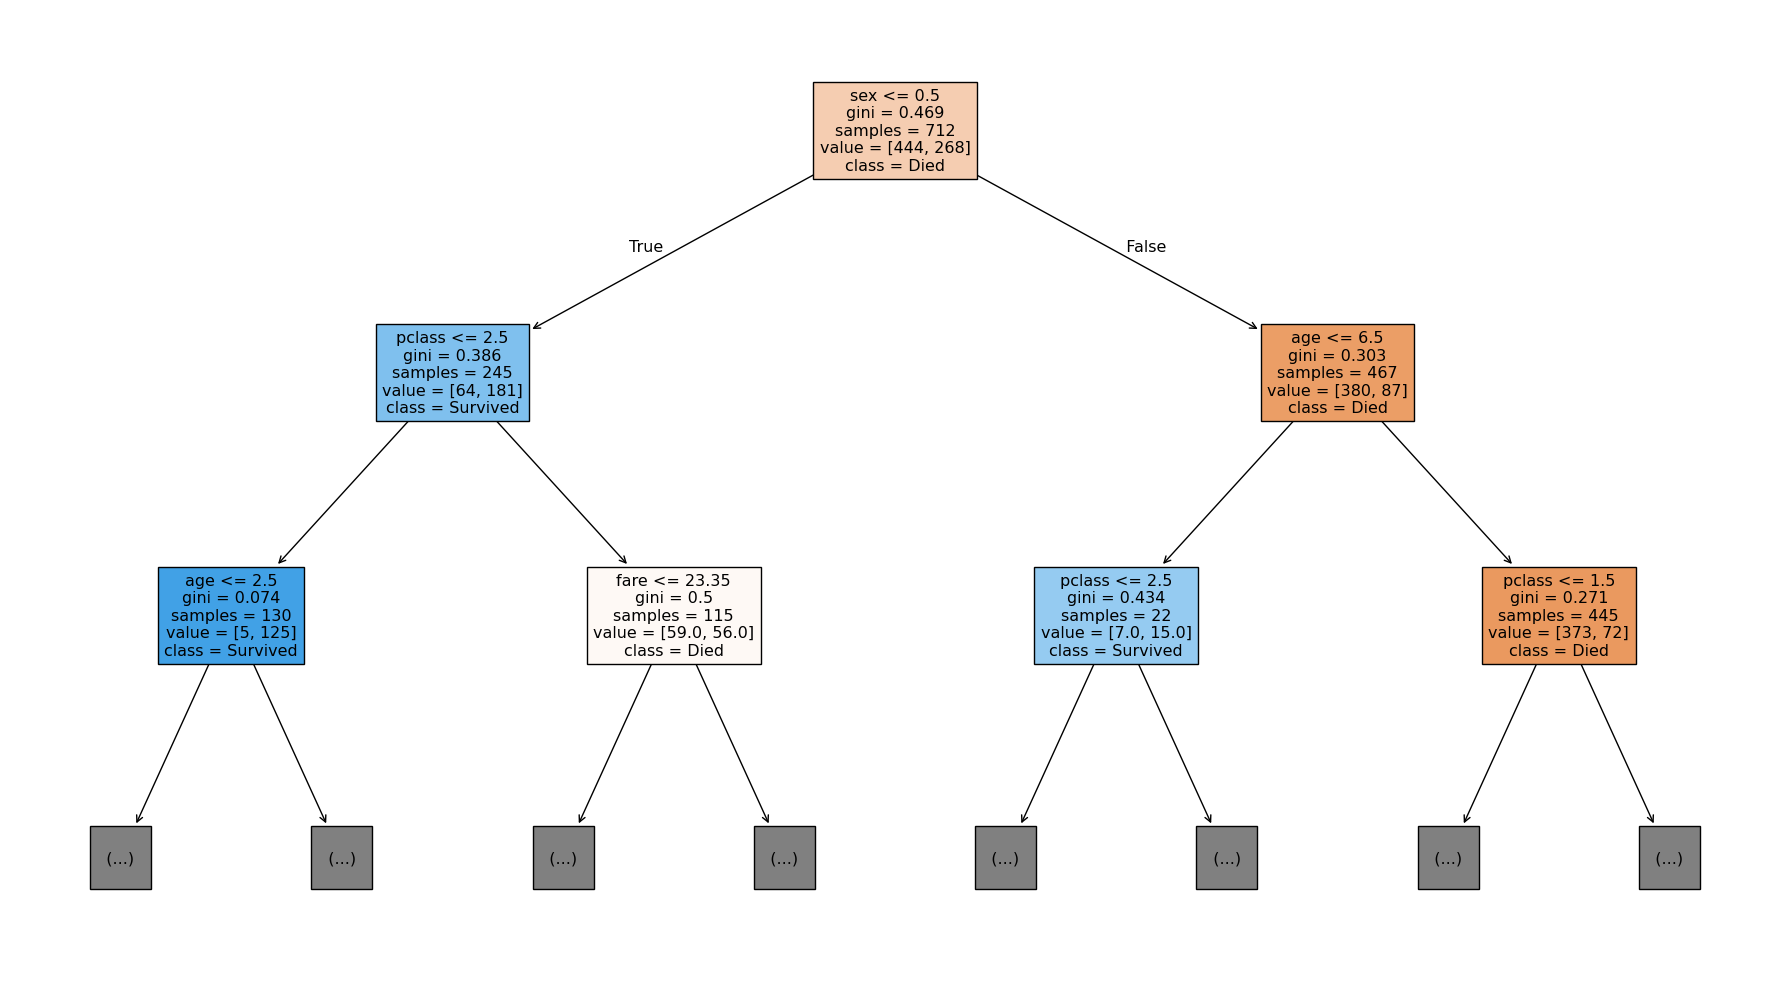

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))

plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died", "Survived"],
    filled = True,
    max_depth = 2
)

plt.tight_layout()
plt.show()

# Decision Tree with pre-pruning

for depth=2, accuracy=0.7653631284916201
for depth=3, accuracy=0.7988826815642458
for depth=4, accuracy=0.7988826815642458
for depth=5, accuracy=0.7988826815642458
for depth=6, accuracy=0.8044692737430168


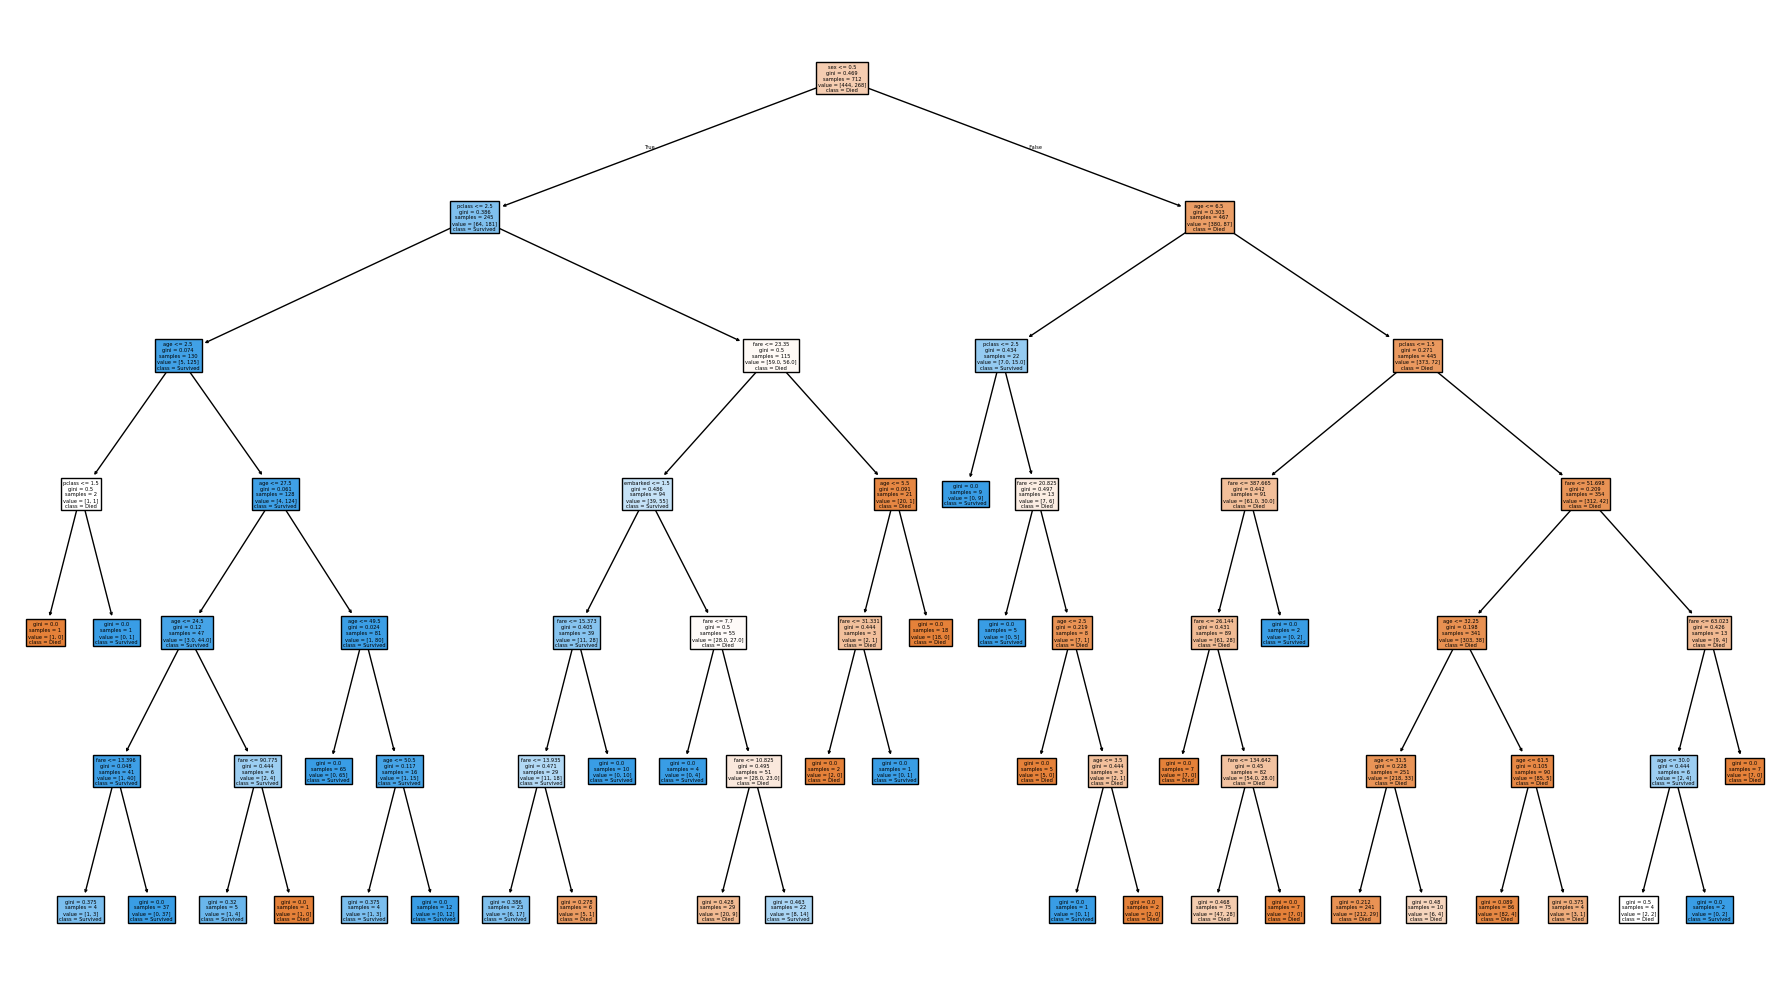

for depth=7, accuracy=0.7988826815642458
for depth=8, accuracy=0.7932960893854749
for depth=9, accuracy=0.7988826815642458
for depth=10, accuracy=0.7877094972067039


In [19]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==6:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

for sample split=10, accuracy=0.8100558659217877


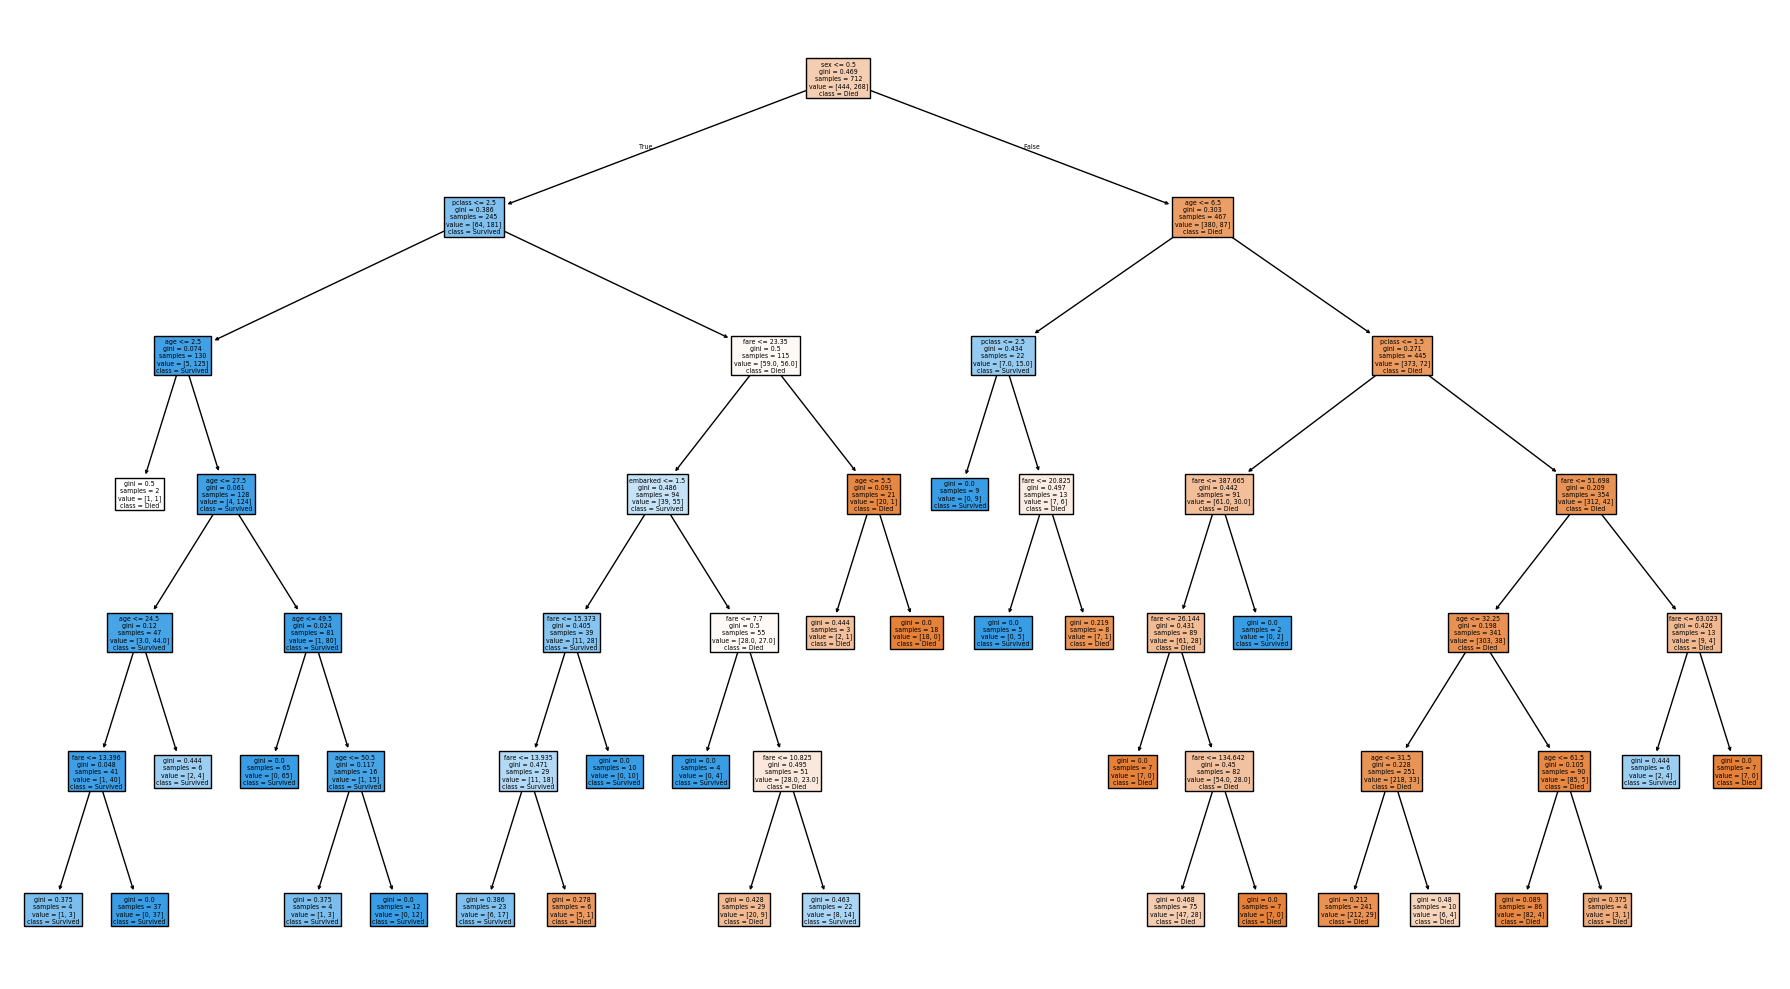

for sample split=15, accuracy=0.8044692737430168
for sample split=20, accuracy=0.8044692737430168
for sample split=25, accuracy=0.7988826815642458
for sample split=30, accuracy=0.7877094972067039


In [20]:
min_samples_split = [10, 15, 20, 25, 30]

for split in min_samples_split:
    model = DecisionTreeClassifier(max_depth = 6, min_samples_split = split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

# Decision Tree with Post-Pruning

In [21]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [23]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [24]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [25]:
best_acc

0.8379888268156425

In [29]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=6)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0015407231242023183), max_depth=6)

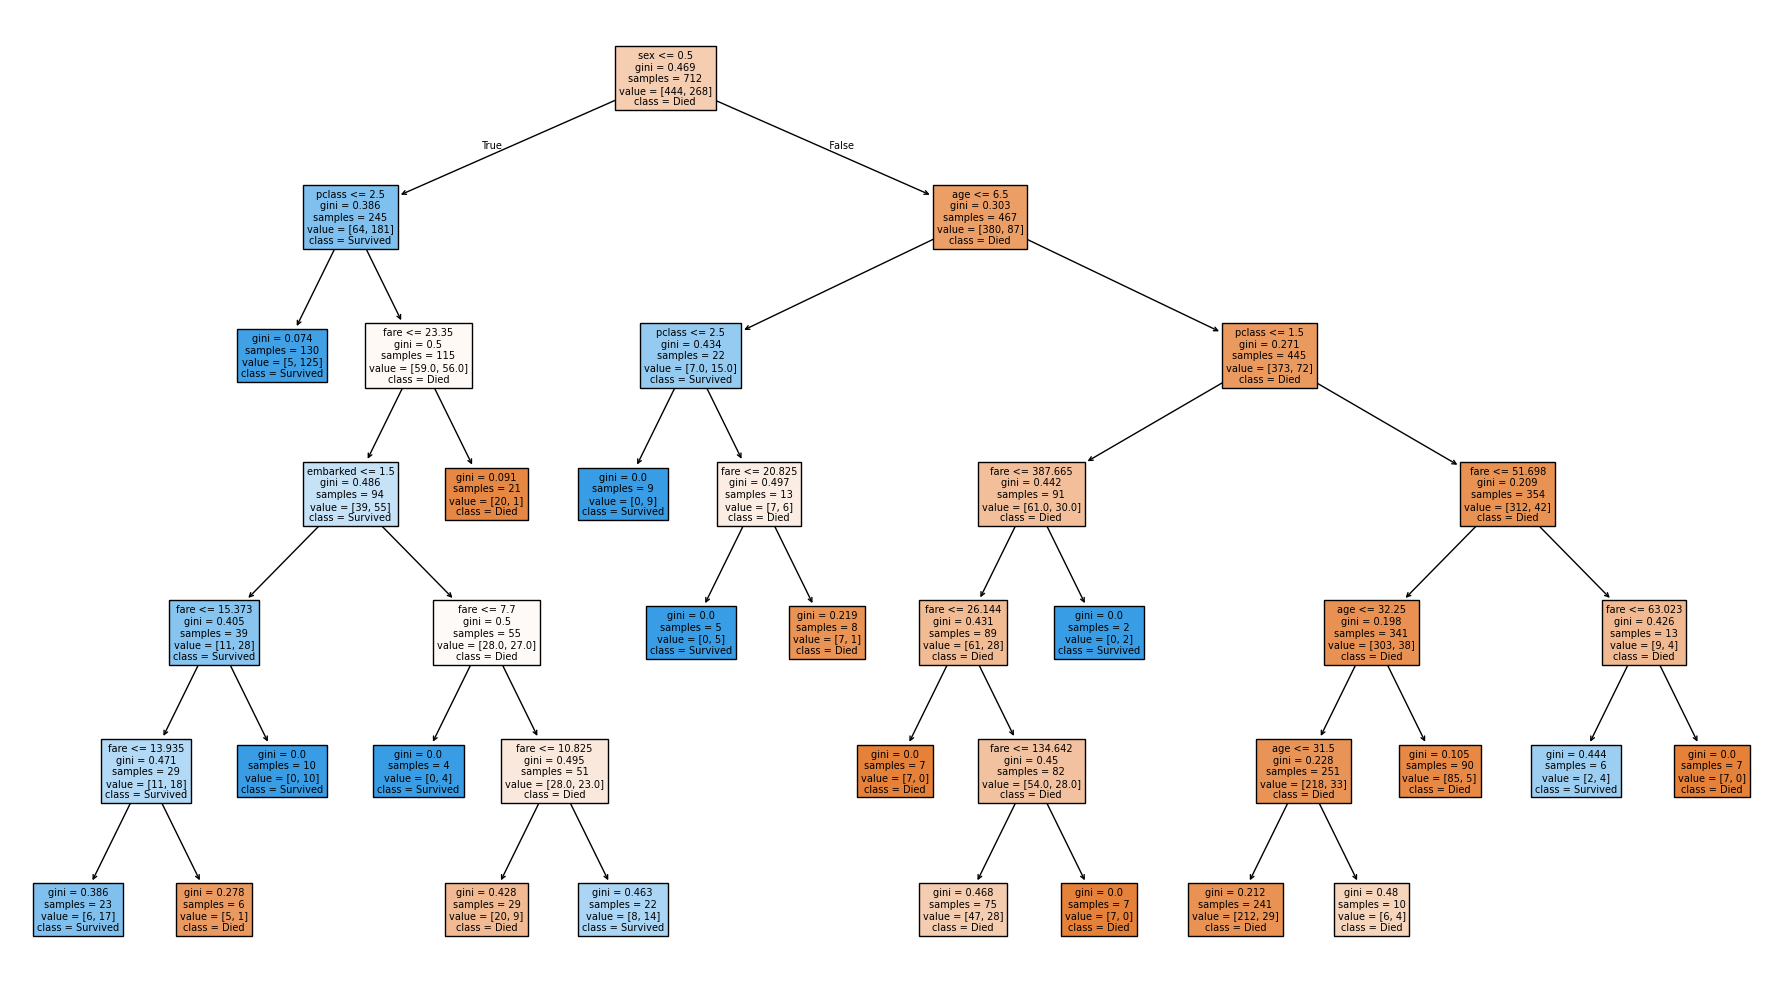

In [30]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [31]:
print(best_model.score(X_test, y_test))

0.8100558659217877
